## Set de Datos

El set de datos contiene un total de 55.056 registros (filas) y 7 columnas que corresponden a información recolectada del comportamiento de              diferentes clientes de una tienda online. Cada cliente representa una fila en el set de datos y por cada cliente tendremos esta información:

* **ID**: código de identificación del cliente.

* **n_clicks**: número de clicks realizados por el cliente en diferentes productos durante el periodo observado.

* **n_visitas**: número de veces que el cliente ha visitado el sitio web de la tienda durante el periodo observado.

* **monto_compras**: monto total de las compras (en dólares) hechas por el cliente durante el periodo observado.

* **monto_descuentos**: monto total de los descuentos(en dólares) otorgados al cliente durante el periodo observado.

* **dias_primera_compra**: días transcurridos    entre la fecha de creación del set de datos y la fecha de la primera compra realizada por el cliente en la    tienda online.

* **info_perfil**: un número entre 0 y 500 que indica el nivel de información suministrada por el cliente en su perfil en la página web (0 indica que el       cliente prácticamente no ha suministrado información alguna más allá de sus datos de contacto).e contacto).tacto)

## El problema a resolver

### ¿Cuáles son los perfiles de cliente de una tienda online (e-commerce)?

A lo largo del proyecto usaremos diferentes herramientas para la limpieza y el análisis exploratorio de datos así como el algoritmo k-means para poder responder a esta pregunta.

In [30]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv('dataset_ecommerce.csv')
df

,ID,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
0,GGNEPpxo,198.0,44.0,3393.0,67.0,241.0,235.0
1,tRA5byjK,303.0,74.0,3026.3,90.4,193.0,246.0
2,vWxSsT0V,267.0,60.0,3490.2,80.5,111.0,220.0
3,sxVV8jGL,177.0,85.0,3525.1,92.7,142.0,200.0
4,YBs4XIN5,224.0,73.0,2980.9,72.6,227.0,109.0
...,...,...,...,...,...,...,...
55051,dDUYxBmO,340.0,80.0,601.0,147.2,201.0,149.0
55052,RIVOxIid,376.0,91.0,1007.5,174.0,226.0,150.0
55053,drs3JLHK,416.0,52.0,753.1,113.0,188.0,241.0
55054,VwC0SosV,457.0,60.0,223.2,111.8,199.0,117.0


* La columna "ID" no contiene información relevante. Por otra parte vemos que las columnas restantes contienen variables numéricas.

In [31]:
df.isna().sum()

ID                     0
n_clicks               7
n_visitas              8
monto_compras          6
monto_descuentos       4
dias_primera_compra    1
info_perfil            9
dtype: int64

* Todas las columnas contienen valores faltantes entre 1 y 9

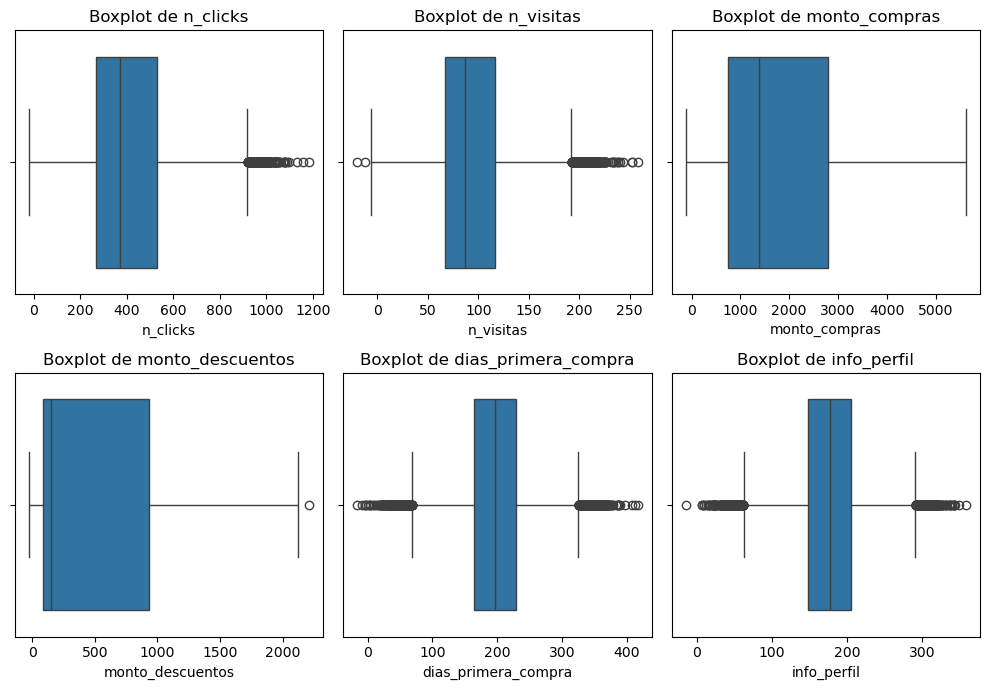

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Extraer columnas numéricas
num_cols = df.select_dtypes(include=['number']).columns

# Figura vacía
plt.figure(figsize=(10, 7))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot de {col}')
plt.tight_layout()

Aunque todas las columnas numéricas contienen valores extremos no podemos determinar si estos realmente son valores atípicos o tienen algún tipo de correspondencia con el comportamiento de los clientes.

Sin embargo, al parecer en las columnas "n_visitas", "dias_primera_compra" e "info_perfil" tenemos valores negativos que definitivamente son atípicos

* Todas las variables numéricas tienen rangos diferentes

In [33]:
df[df[num_cols]<0].count()

ID                     0
n_clicks               2
n_visitas              4
monto_compras          1
monto_descuentos       2
dias_primera_compra    5
info_perfil            1
dtype: int64

* En efecto todas las columnas numéricas contienen unos cuantos valores negativos .

### Limpieza del set de datos

In [34]:
df_clean = df.dropna()
print(f'Tamaño del dataset antes de la eliminación de datos faltantes {df.shape}')
print(f'Tamaño del dataset después de la eliminación de datos faltantes {df_clean.shape}')

Tamaño del dataset antes de la eliminación de datos faltantes (55056, 7)
Tamaño del dataset después de la eliminación de datos faltantes (55021, 7)


In [35]:
df_clean = df_clean.copy()
df_clean.drop(columns=['ID'], inplace=True)

In [36]:
df_clean

,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil
0,198.0,44.0,3393.0,67.0,241.0,235.0
1,303.0,74.0,3026.3,90.4,193.0,246.0
2,267.0,60.0,3490.2,80.5,111.0,220.0
3,177.0,85.0,3525.1,92.7,142.0,200.0
4,224.0,73.0,2980.9,72.6,227.0,109.0
...,...,...,...,...,...,...
55051,340.0,80.0,601.0,147.2,201.0,149.0
55052,376.0,91.0,1007.5,174.0,226.0,150.0
55053,416.0,52.0,753.1,113.0,188.0,241.0
55054,457.0,60.0,223.2,111.8,199.0,117.0


In [37]:
print(f' Tamaño dataset antes de la eliminación de los valores extremos: {df_clean.shape}')
df_clean = df_clean[df_clean[num_cols].ge(0).all(axis=1)]
print(f' Tamaño dataset después de la eliminación de los valores extremos: {df_clean.shape}')

 Tamaño dataset antes de la eliminación de los valores extremos: (55021, 6)
 Tamaño dataset después de la eliminación de los valores extremos: (55006, 6)


### Análisis exploratorio del set de datos

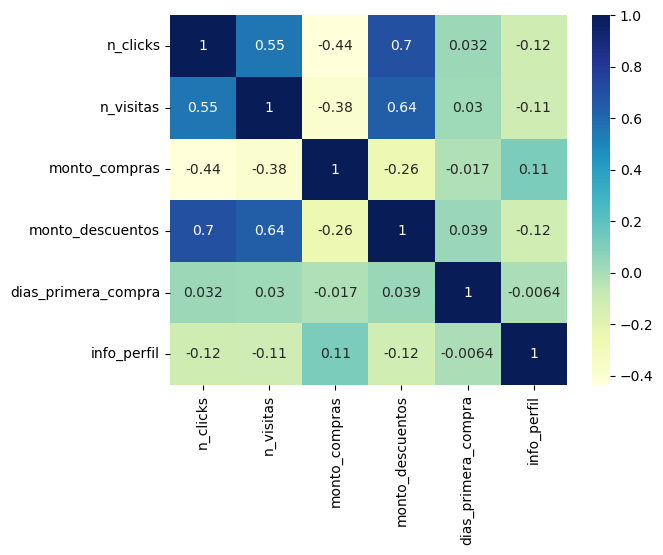

In [39]:
corr = df_clean.corr()
ax = sns.heatmap(corr, cmap="YlGnBu", annot=True)

No existen niveles de correlación especialmente altos entre los diferentes pares de variables así que preservaremos todas las variables para la construcción del modelo de segmentación.

### Segmentación de clientes con K-means

In [40]:
# Escalamiento de datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xs=scaler.fit_transform(df_clean)

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state=23)
kmeans.fit(Xs)

KMeans(n_clusters=4, random_state=23)

In [42]:
kmeans.inertia_

2905.2152379924114

Text(0, 0.5, 'Inercia')

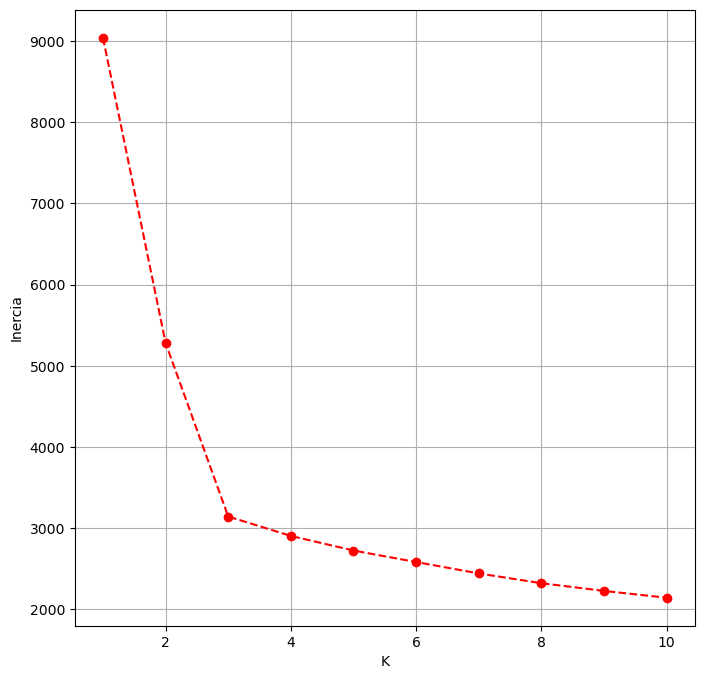

In [57]:
# Método codo para determinar el valor óptimo de K 

import numpy as np

# Posibles segmentos: k = 1, 2, ... , 10
K = np.arange(1,11)

# Por cada valor de K construir el modelo kmeans y calcular su iniecia
inercias = []
for k in K:
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state = 23)
    kmeans.fit(Xs)
    inercias.append(kmeans.inertia_)

# Generar la gráfica y buscar el "codo"
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(K, inercias, '--ro')
ax.grid(axis='both')
ax.set_xlabel('K')
ax.set_ylabel('Inercia')

Vemos que en K=3 tenemos el codo de la gráfica. Así que usaremos K=3 para definir el modelo final de segmentación

In [44]:
kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(Xs)

KMeans(n_clusters=3, random_state=23)

### Análisis de cada segmento de cliente

Asignando cada cliente al segmento determinado por el modelo k-means

In [45]:
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [46]:
    df_clean = df_clean.copy()
    df_clean['segmento'] = kmeans.labels_
    df_clean

,n_clicks,n_visitas,monto_compras,monto_descuentos,dias_primera_compra,info_perfil,segmento
0,198.0,44.0,3393.0,67.0,241.0,235.0,2
1,303.0,74.0,3026.3,90.4,193.0,246.0,2
2,267.0,60.0,3490.2,80.5,111.0,220.0,2
3,177.0,85.0,3525.1,92.7,142.0,200.0,2
4,224.0,73.0,2980.9,72.6,227.0,109.0,2
...,...,...,...,...,...,...,...
55051,340.0,80.0,601.0,147.2,201.0,149.0,1
55052,376.0,91.0,1007.5,174.0,226.0,150.0,1
55053,416.0,52.0,753.1,113.0,188.0,241.0,1
55054,457.0,60.0,223.2,111.8,199.0,117.0,1


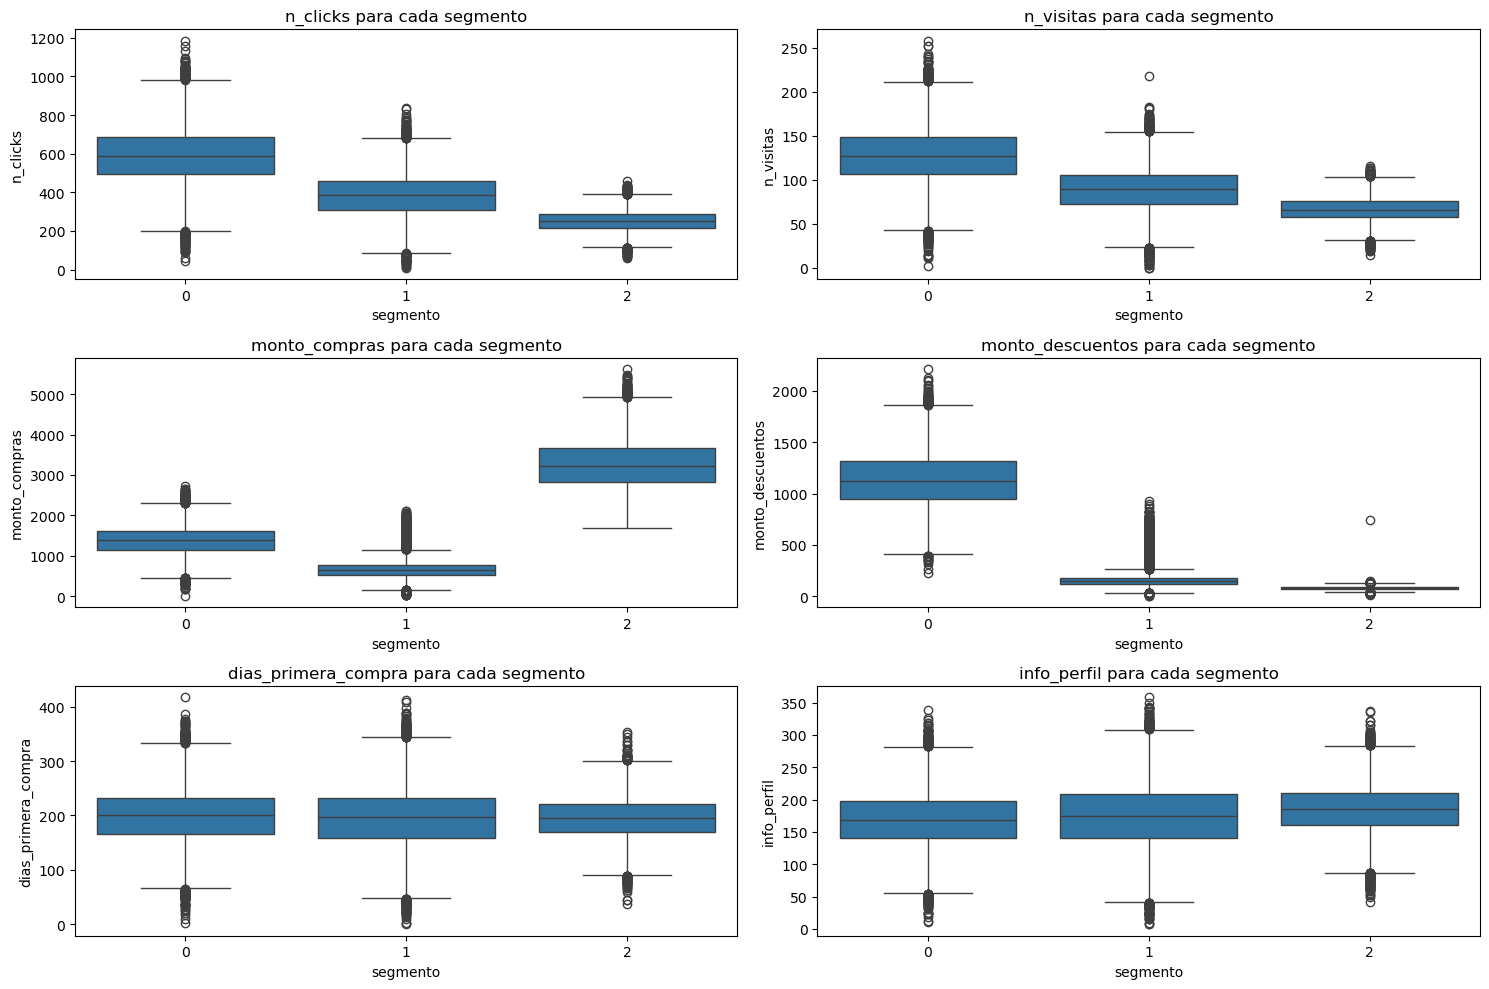

In [47]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['n_clicks', 'n_visitas', 'monto_compras', 'monto_descuentos', 'dias_primera_compra', 'info_perfil'], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='segmento', y=col, data=df_clean)
    plt.title(f'{col} para cada segmento')
plt.tight_layout()
plt.show()
    

Vemos que las variables "dias_primera_compra" e "info_perfil" son muy similares entre los diferentes grupos así que podremos eliminarlas para facilitar el análisis

In [48]:
segmentos = df_clean.copy()
segmentos.drop(columns=['dias_primera_compra', 'info_perfil'], inplace=True)

Se visualizan todas las variables de manera simultánea con gráficos de radar:

In [49]:
radar = segmentos.groupby('segmento').mean()
radar

,n_clicks,n_visitas,monto_compras,monto_descuentos
segmento,,,,
0,590.338081,127.080723,1384.510281,1133.192974
1,384.446163,88.775604,673.935837,151.889522
2,253.252164,66.625472,3246.384007,80.177969


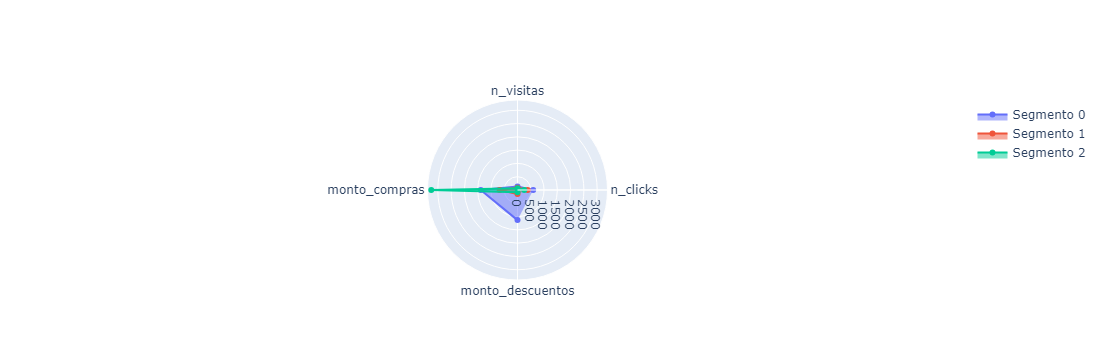

In [58]:
import plotly.graph_objects as go

# Contenedor de la figura
fig = go.Figure()

# Grafico de radar para cada segmento
fig.add_trace(go.Scatterpolar(
    r=radar.iloc[0],
    theta=radar.columns,
    fill='toself', # Rellenar el gráfico
    name= 'Segmento 0'
))

fig.add_trace(go.Scatterpolar(
    r=radar.iloc[1],
    theta=radar.columns,
    fill='toself',
    name= 'Segmento 1'
))

fig.add_trace(go.Scatterpolar(
    r=radar.iloc[2],
    theta=radar.columns,
    fill='toself',
    name= 'Segmento 2'
))

fig.write_image('radar.png')
fig.show()

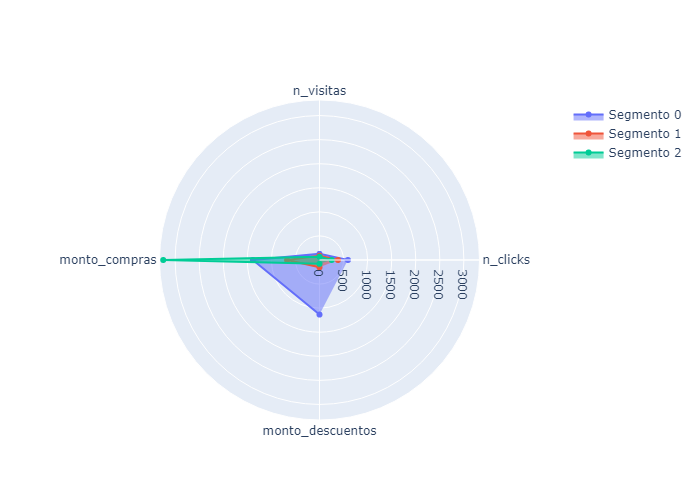

In [60]:
from IPython.display import Image

Image('radar.png')

Como las escalas de las variables de interés son diferentes, al generar el gráfico de radar resulta difícil apreciar algunos detalles.

Usemos el dataset escalado para construir el gráfico de radar:

In [51]:
segmentos_s = pd.DataFrame(Xs, columns=df_clean.columns[:-1])

In [52]:
segmentos_s['segmento'] = kmeans.labels_

In [53]:
segmentos_s.drop(columns=['dias_primera_compra', 'info_perfil'], inplace=True)
segmentos_s

,n_clicks,n_visitas,monto_compras,monto_descuentos,segmento
0,0.160000,0.170543,0.603233,0.029998,2
1,0.249362,0.286822,0.537948,0.040569,2
2,0.218723,0.232558,0.620538,0.036097,2
3,0.142128,0.329457,0.626751,0.041608,2
4,0.182128,0.282946,0.529865,0.032528,2
...,...,...,...,...,...
55001,0.280851,0.310078,0.106162,0.066230,1
55002,0.311489,0.352713,0.178533,0.078337,1
55003,0.345532,0.201550,0.133241,0.050779,1
55004,0.380426,0.232558,0.038900,0.050237,1


In [54]:
radar_s = segmentos_s.groupby(['segmento']).mean()
radar_s

,n_clicks,n_visitas,monto_compras,monto_descuentos
segmento,,,,
0,0.493905,0.492561,0.245653,0.511675
1,0.318678,0.344091,0.119147,0.068349
2,0.207023,0.258238,0.577130,0.035951


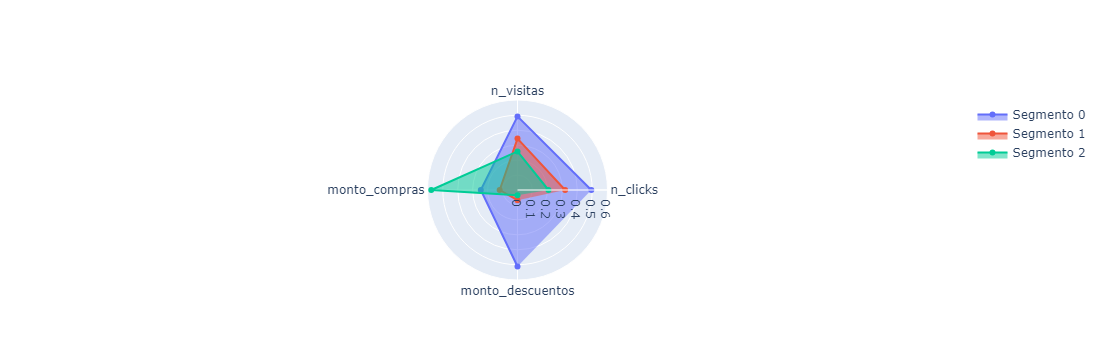

In [66]:
# Contenedor de la figura
fig = go.Figure()

# Grafico de radar para cada segmento
fig.add_trace(go.Scatterpolar(
    r=radar_s.iloc[0],
    theta=radar_s.columns,
    fill='toself', # Rellenar el gráfico
    name= 'Segmento 0'
))

fig.add_trace(go.Scatterpolar(
    r=radar_s.iloc[1],
    theta=radar_s.columns,
    fill='toself',
    name= 'Segmento 1'
))

fig.add_trace(go.Scatterpolar(
    r=radar_s.iloc[2],
    theta=radar_s.columns,
    fill='toself',
    name= 'Segmento 2'
))

fig.write_image('radar_s.png')
fig.show()

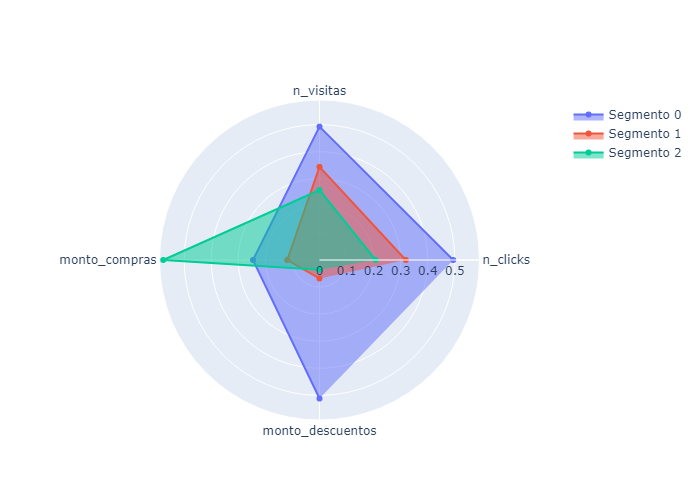

In [67]:
Image('radar_s.png')

Y con esto ya podemos caracterizar claramente cada uno de los segmentos. Por último podemos retomar el promedio de cada variable para cada segmento (sin escalamiento) para completar esta caracterización:

In [56]:
radar

,n_clicks,n_visitas,monto_compras,monto_descuentos
segmento,,,,
0,590.338081,127.080723,1384.510281,1133.192974
1,384.446163,88.775604,673.935837,151.889522
2,253.252164,66.625472,3246.384007,80.177969


* #### **Segmento 0**:
	Se trata de clientes que tienden a tener más 	interacciones con el sitio web que los otros 	dos segmentos. Esto se observa en un promedio 	en       el número de visitas de 127 así como un 	número de clicks de 590.
	Pero lo más importante es que se trata de 	clientes que están más interesados en las 	ofertas, pues el monto de los descuentos es 	en promedio      de 1133,2 USD que es más alto que 	cualquiera de los otros dos segmentos.

* #### **Segmento 1**:
    De los tres segmentos es el que menos montos 	en compras tiene (promedio de 673,9 USD) y se 	caracteriza además por tener niveles medios 	de       interacción con promedios en el número de 	visitas y de clicks de 384.4 y 88.7 	respectivamente.
	De igual forma, tampoco se trata de un 	segmento de cliente particularmente 	interesado en los descuentos, alcanzando un 	promedio similar al      observado en el segmento 	1 (151,9 USD).

* #### **Segmento 2**:
    Este segmento es el que menos interacciones 	tiene con el sitio web, con un número de 	visitas y de clicks promedio de 66 y 253 respectivamente.
	Pero la principal característica de este 	segmento es que se trata de clientes que no 	buscan descuentos (promedio de 80,2 USD, el 	menor de     todos los segmentos) y que a su vez 	tiene el monto de compras más alto de todos 	los segmentos (promedio de 3246,4 USD).
